In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, roc_auc_score, recall_score,
    precision_score, f1_score, RocCurveDisplay)

In [28]:
df = pd.read_csv('./data/clean_train.csv')
df.head()

uniqueid  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  current_pincode_id  state_id  employee_code_id  ...  \
0               45                1441         6              1998  ...   
1               45                1502         6              1998  ...   
2               45                1497         6              1998  ...   
3               45                1501         6              1998  ...   
4               45                1495         6              1998  ...   

   delinquent_accts_in_last_six_months  no_of_inquiries  loan_default  \
0                                    0                0             0   
1                                    1                0             1   
2                                    0                0             0   
3                                    0                1             1   
4                                    0                1             1   

   employment_self  employment_none  age_at_disbursal  \
0                0                0                34   
1                1                0                33   
2                1                0                33   
3                1                0                25   
4                1                0                41   

   average_acct_age_months  credit_history_length_months  cns_score_category  \
0                        0                             0                   0   
1                       23                            23                   9   
2                        0                             0                   0   
3                        8                            15                  12   
4                        0                             0                   0   

   cns_score_unreliable  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 42 columns]

In [29]:
df.dtypes

uniqueid                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
current_pincode_id                       int64
state_id                                 int64
employee_code_id                         int64
mobileno_avl_flag                        int64
aadhar_flag                              int64
pan_flag                                 int64
voterid_flag                             int64
driving_flag                             int64
passport_flag                            int64
perform_cns_score                        int64
pri_no_of_accts                          int64
pri_active_accts                         int64
pri_overdue_accts                        int64
pri_current_balance                      int64
pri_sanctione

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   uniqueid                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   current_pincode_id                   233154 non-null  int64  
 8   state_id                             233154 non-null  int64  
 9   employee_code_id                     233154 non-null  int64  
 10  mobileno_avl_flag                    233154 non-null  int64  
 11  aadhar_flag  

In [31]:
df.isnull().sum()

uniqueid                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
current_pincode_id                     0
state_id                               0
employee_code_id                       0
mobileno_avl_flag                      0
aadhar_flag                            0
pan_flag                               0
voterid_flag                           0
driving_flag                           0
passport_flag                          0
perform_cns_score                      0
pri_no_of_accts                        0
pri_active_accts                       0
pri_overdue_accts                      0
pri_current_balance                    0
pri_sanctioned_amount                  0
pri_disbursed_amount                   0
sec_no_of_accts                        0
sec_active_accts

In [32]:
df.columns


Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id',
       'employee_code_id', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag',
       'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score',
       'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
       'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
       'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'no_of_inquiries',
       'loan_default', 'employment_self', 'employment_none',
       'age_at_disbursal', 'average_acct_age_months',
       'credit_history_length_months', 'cns_score_category',
       'cns_score_unreliable'],
      dtype='object')

In [33]:
df.corr()['loan_default'].sort_values()

perform_cns_score                     -0.057929
credit_history_length_months          -0.042126
aadhar_flag                           -0.041593
pri_active_accts                      -0.041451
age_at_disbursal                      -0.037287
pri_no_of_accts                       -0.035456
new_accts_in_last_six_months          -0.029400
pri_current_balance                   -0.027386
manufacturer_id                       -0.025039
average_acct_age_months               -0.024781
pri_sanctioned_amount                 -0.011304
pri_disbursed_amount                  -0.011155
primary_instal_amt                    -0.010616
sec_no_of_accts                       -0.008385
passport_flag                         -0.007602
sec_sanctioned_amount                 -0.006354
sec_disbursed_amount                  -0.006248
sec_active_accts                      -0.005993
driving_flag                          -0.005821
sec_current_balance                   -0.005531
sec_instal_amt                        -0

In [34]:
df['loan_default'].value_counts(normalize = True) * 100

0    78.292888
1    21.707112
Name: loan_default, dtype: float64

In [35]:
df['loan_default'].describe()


count    233154.000000
mean          0.217071
std           0.412252
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: loan_default, dtype: float64

(array([182543.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  50611.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

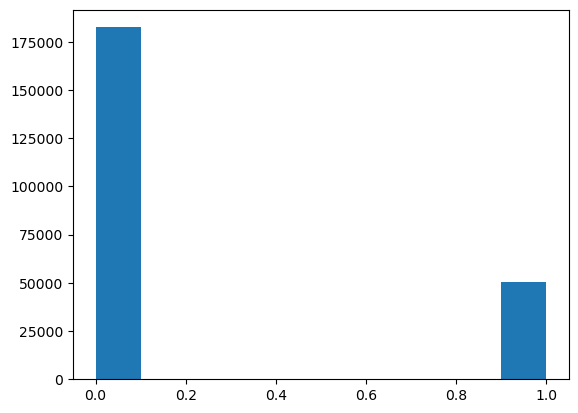

In [36]:
plt.hist(df['loan_default'])

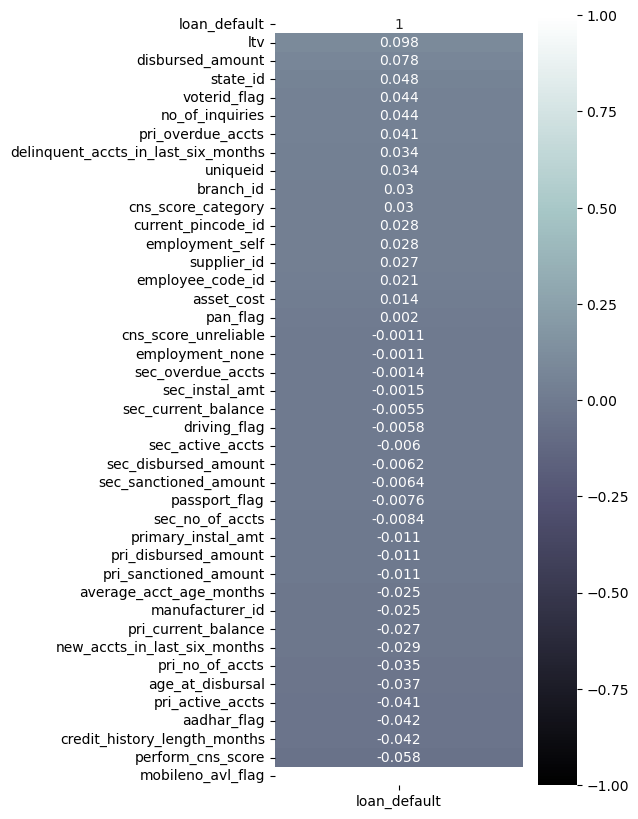

In [37]:
corr = df.corr()[['loan_default']].sort_values(by = 'loan_default', ascending = False)

plt.figure(figsize = (4, 10))

sns.heatmap(corr,
           cmap = 'bone',
           annot = True,
           vmin = -1,
           vmax = 1);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


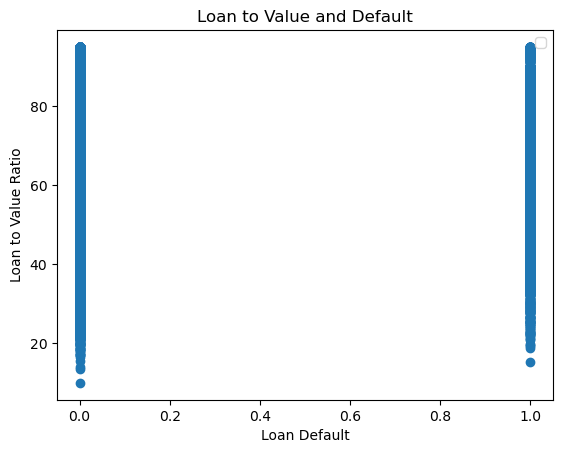

In [38]:
plt.title('Loan to Value and Default')

plt.scatter(df['loan_default'],
           df['ltv']),
        #   color = 'r', alpha = 0.5, label = 'Heart Disease')

plt.xlabel('Loan Default')
plt.ylabel('Loan to Value Ratio')
plt.legend();

In [39]:
df2 = pd.read_csv('./data/train_resampled',  index_col=[0])
df2.head()

disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0             50578       58400  89.55         67        22807   
1             47145       65550  73.23         67        22807   
2             53278       61360  89.63         67        22807   
3             57513       66113  88.48         67        22807   
4             52378       60300  88.39         67        22807   

   manufacturer_id  current_pincode_id  state_id  employee_code_id  \
0               45                1441         6              1998   
1               45                1502         6              1998   
2               45                1497         6              1998   
3               45                1501         6              1998   
4               45                1495         6              1998   

   mobileno_avl_flag  ...  delinquent_accts_in_last_six_months  \
0                  1  ...                                    0   
1                  1  ...                                    1   
2                  1  ...                                    0   
3                  1  ...                                    0   
4                  1  ...                                    0   

   no_of_inquiries  employment_self  employment_none  age_at_disbursal  \
0                0                0                0                34   
1                0                1                0                33   
2                0                1                0                33   
3                1                1                0                25   
4                1                1                0                41   

   average_acct_age_months  credit_history_length_months  cns_score_category  \
0                        0                             0                   0   
1                       23                            23                   9   
2                        0                             0                   0   
3                        8                            15                  12   
4                        0                             0                   0   

   cns_score_unreliable  loan_default  
0                     0             0  
1                     0             1  
2                     0             0  
3                     0             1  
4                     0             1  

[5 rows x 41 columns]

In [40]:
df2['loan_default'].value_counts(normalize = True) * 100

0    50.0
1    50.0
Name: loan_default, dtype: float64

In [41]:
X = df2.drop(columns =['loan_default'])
y = df2['loan_default']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [43]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Logistic Regression

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(X_train, y_train)

print(f'Training Score: {round(lr.score(X_train, y_train),2)}')
print(f'Testing Score: {round(lr.score(X_test, y_test),2)}')

Training Score: 0.62
Testing Score: 0.62


In [46]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components = 10, random_state = 42)

pca.fit(X_train)

In [48]:
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

lr.fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(lr.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(lr.score(Z_test, y_test),4)}')

Training Score: 0.5743
Testing Score: 0.5756


* PCA Made Logistic regression worse

In [52]:
preds = lr.predict(Z_test)


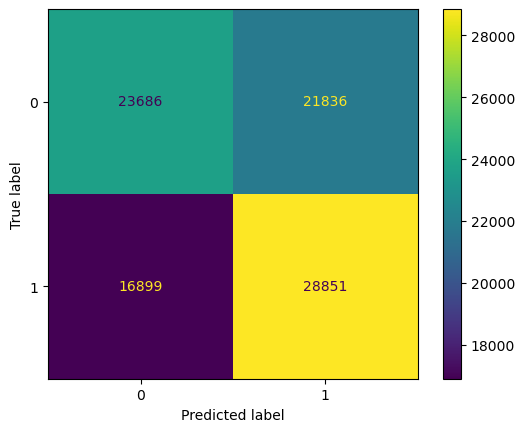

In [54]:
ConfusionMatrixDisplay.from_estimator(lr, Z_test, y_test);


* sensitivity / recall = actual positives correctly predicted

In [56]:
recall = recall_score(y_test, preds, pos_label=0)
recall

0.5203198453495014

* precision = predicted positives that are correct

In [57]:
precision = precision_score(y_test, preds, pos_label=0)
precision

0.5836146359492423

* F1

In [58]:
f1_score(y_test, preds, pos_label=0)


0.550152716968423

### Decision Tree

In [60]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.9999379140584485
Score on testing set: 0.7235734946095188
